# Session 9: final projects
- twitter data (con't)
- data visualization and analysis for final project

In [1]:
# import as needed
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [2]:
# read a file and show detail
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
print(tw.head(10))

#get entry for ketword 'covid'
a=tw[tw['term']=='covid']
print('a=\n',a)
b=a.set_index(pd.Index(range(a.shape[0])))  #reset the index
print('b=\n',b)
b.loc[0,'frequency']
print('b=\n',b.loc[0]['frequency'])


          term  frequency
0  coronavirus     328383
1        covid     203800
2           19     193076
3      covid19     167520
4          NaN      62057
5       people      46485
6          amp      44220
7        cases      39189
8          new      38259
9          via      35970
a=
        term  frequency
1     covid     203800
1002  covid     203800
b=
     term  frequency
0  covid     203800
1  covid     203800
b=
 203800


               covid  coronavirus
2020-03-22   67037.0     223843.0
2020-03-23   84031.0     245729.0
2020-03-24   91123.0     254575.0
2020-03-25   90652.0     253734.0
2020-03-26  128786.0     340182.0
...              ...          ...
2020-07-02  212170.0     212732.0
2020-07-03  206981.0     217863.0
2020-07-04  164436.0     189310.0
2020-07-05  181446.0     202376.0
2020-07-06  214526.0     208812.0

[107 rows x 2 columns]


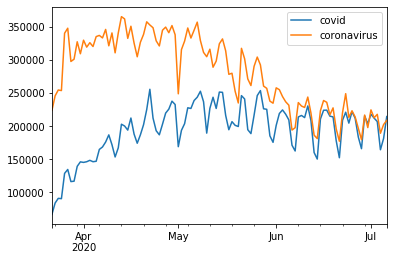

In [3]:
# read all files and plot some information
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid']
#keywords=['china']

keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['covid','coronavirus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)             #a DataFrame to save selected data
folder='../sample-code/data/covid-term/'  #folder with the data files

#loop through each day
for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:   #check if the key exists or not
            f=0
        else:                      #sometimes there are two duplicates for the entry, not sure why
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
print(df)
df.plot()

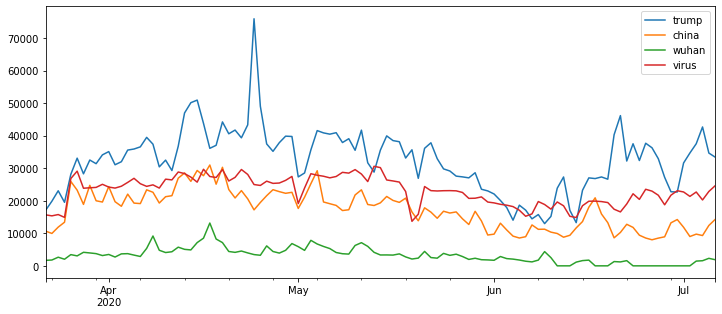

In [4]:
# use it as a function
# read all files and plot some information
def term_plot(keywords):
    t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
#keywords=['covid']
#keywords=['china']

#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

    df = DataFrame(index=t_range)             #a DataFrame to save selected data
    folder='../sample-code/data/covid-term/'  #folder with the data files

    #loop through each day
    for d in t_range:
        filename=folder + str(d)[:10] + '_top1000terms.csv'
        #print('filename --> ',filename)
        tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
        for key in keywords:
            tw_short=tw[tw['term']==key]
            if tw_short.shape[0]==0:   #check if the key exists or not
                f=0
            else:                      #sometimes there are two duplicates for the entry, not sure why
                tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
                f=tw_short2.loc[0,'frequency']
            df.loc[d,key]=f
    df.plot(figsize=(12,5))
    return df
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['trump','china','wuhan','virus']
df=term_plot(keywords)

In [5]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
mean = df.mean()['covid'] # get average
weekdays=mean*1.1
weekends=mean*0.9
flag=7  #1-5 for weekdays, 6-7 for weekends
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot()

KeyError: 'covid'

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['covid']+df['coronavirus'])


anaylsis: talk about relation between covid tweets and weekday-weekend schedules.

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases

## mobility
how people were moving while the period of COVID-19

check out this website 
https://www.google.com/covid19/mobility/


## Final project
choices:
- covid cases
- retail companies
- high tech companies
- crime rate
- online education


- Leo
  - trends of covid cases
  - difference between China and US, period, weekends pattern, total
  - write analysis for US cases
  - download China data for comparison.
  
- Jay
  - stocks of retail companies, 
  - diff in china and US
  - get data from yahoo finance and plot
  - write analysis
  - classify those companies by total price, trends and type
  
- James
  - crime
  - download excel and save as csv
  - read and plot in python



### crime data:
- https://nij.ojp.gov/funding/real-time-crime-forecasting-challenge
- https://oag.ca.gov/crime
- https://ucr.fbi.gov/crime-in-the-u.s/2019/preliminary-report/tables/table-1/table-1.xls
- https://ucr.fbi.gov/hate-crime/2018/tables/table-2.xls
- https://www.fbi.gov/services/cjis/ucr/publications#Hate-Crime%20Statistics
- https://web.archive.org/web/20160602124958/https://www.fbi.gov/news/stories/2014/november/crime-statistics-for-2013-released
- https://web.archive.org/web/20160428023232/http://www.disastercenter.com/crime/
- https://www.census.gov/quickfacts/fact/table/US/PST045219
- https://crime-statistics.co.uk/postcode/bt488hh


#### comment:

From those searching, it looks like crime statistics require quite a period for the data to come out. For concrete data, we can only get prelimilary data up to 2019. The data for 2020 is unstructured and hard to find.

This make sense because such researches require accurate historical data. On the other hand, what we intend to do, is using some temperary information to predict crime rates in near future. This may or may not be that accurate, but could provide a pespective. A previous approach from Twitter data can be found [here](https://sci-hub.st/https://www.researchgate.net/publication/323532548_Mining_Twitter_data_for_crime_trend_prediction)

### suggestions
try this project
https://nij.ojp.gov/funding/real-time-crime-forecasting-challenge


### Presentation